In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('diabetes.csv')

In [3]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df1.shape

(768, 9)

In [5]:
df1.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

<AxesSubplot:>

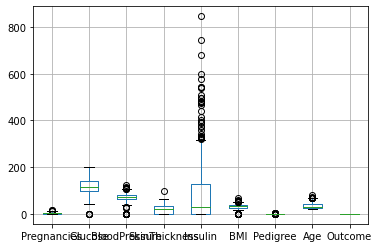

In [6]:
df1.boxplot()

In [7]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

In [8]:
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:>

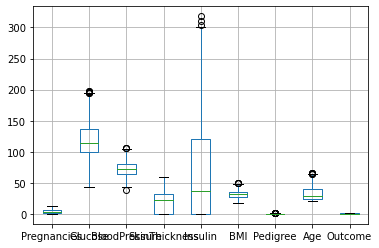

In [9]:
df1.boxplot()

In [10]:
df1.shape

(639, 9)

In [11]:
x = df1.iloc[:, :-1].values
y = df1.iloc[:, 8].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = classifier.predict(x_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print(result1)
# accuracy = zero_one_score(y_test, y_pred)
# error_rate = 1 - accuracy
# print(error_rate)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2*100)
error_rate = 1 - result2
print('Error Rate:', error_rate)

Confusion Matrix:
[[94 13]
 [22 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       107
           1       0.70      0.58      0.64        53

    accuracy                           0.78       160
   macro avg       0.76      0.73      0.74       160
weighted avg       0.78      0.78      0.78       160

Accuracy: 78.125
Error Rate: 0.21875
